In [1]:
from __future__ import print_function

plot_to_pdf = True

if plot_to_pdf:
    import matplotlib as mpl
    mpl.use('pdf')
    
    import matplotlib.pyplot as plt
    
    plt.rc('font', family='serif', serif='Times')
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('axes', labelsize=10)
    plt.rc('legend', fontsize=10)
    title_font_size = 12
    data_font_size = 8
else:
    import matplotlib.pyplot as plt

from sympy import Symbol, diff, simplify, latex
import numpy as np
import time
from tqdm import tqdm
from common import *
from tqdm import tqdm
    
%matplotlib inline

common.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Valkyrie Sparsity

In [2]:
ylims = [-7.0, 7.0]

# L2

In [3]:
l2_problem, l2_solver = load_problem(
    'configs/valkyrie.xml',
    problem_name='valkyrie', solver_name='DDP', problem_params={
# ==========================================
        'LossType': 'L2',
        'ControlCostWeight': '1',
        'R_rate': '1',
# ==========================================
    })
l2_solver.debug_mode = True
l2_solution = l2_solver.solve()

In [4]:
times = [0]
for i in range(l2_problem.T - 1):
    times.append(times[i] + l2_problem.tau)
# times = times[1:]

# Figure 10. Valkyrie Reaching Task with L2 Solution

/home/tdinev/miniconda3/envs/py2gen/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


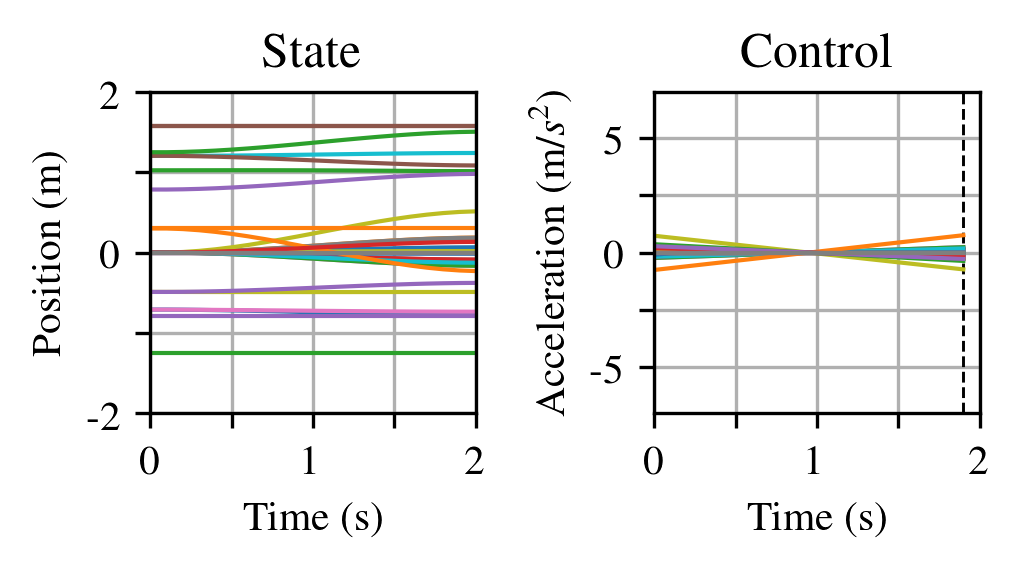

In [5]:
fig = plt.figure() #figsize=(13,6))
fig.set_size_inches(3.5, 2)
fig.set_dpi(300)

ax = plt.subplot(1,2,1)
plt.grid()
plt.title('State')
plt.plot(times, l2_problem.X[:38,:].T, linewidth=1)

ax.set_xticks(np.linspace(0, 2, 5))
ax.set_xticklabels(['0', '', '1', '', '2'])

ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_yticklabels(['-2', '', '0', '', '2'])

plt.xlabel('Time (s)')
plt.xlim(0, 2)
plt.ylabel('Position (m)')

ax = plt.subplot(1,2,2)
plt.plot(times[:-1], l2_solution, label='Solution', linewidth=1)
plt.title('Control')
plt.ylim(*ylims)
plt.xlim(0, 1.9)

ax.set_yticks(np.linspace(-5, 5, 5))
ax.set_yticklabels(['-5', '', '0', '', '5'])

plt.vlines(1.9, ylims[0], ylims[1], linewidth=0.7, linestyle='dashed')
ax.set_xticks(np.linspace(0, 2, 5))
ax.set_xticklabels(['0', '', '1', '', '2'])

plt.grid()
plt.xlabel('Time (s)')
plt.ylabel(r'Acceleration (m/$s^2$)')

plt.tight_layout()

In [6]:
joint_used = [not np.allclose(l2_problem.X[i + 38,:], 0, atol=1e-3) for i in range(l2_problem.num_controls)]
print('L2 used {0} joints'.format(np.sum(joint_used)))

L2 used 27 joints


# Pseudo-Huber


In [7]:
pseudo_huber_problem, pseudo_huber_solver = load_problem(
    'configs/valkyrie.xml',
    problem_name='valkyrie', solver_name='DDP', problem_params={
# ==========================================
        'LossType': 'PseudoHuber',
        'HuberRate': '0.001',
        'ControlCostWeight': '1000',
        'R_rate': '0',
# ==========================================
    })
pseudo_huber_solver.debug_mode = True
pseudo_huber_solver.max_iterations = 500
pseudo_huber_solution = pseudo_huber_solver.solve()

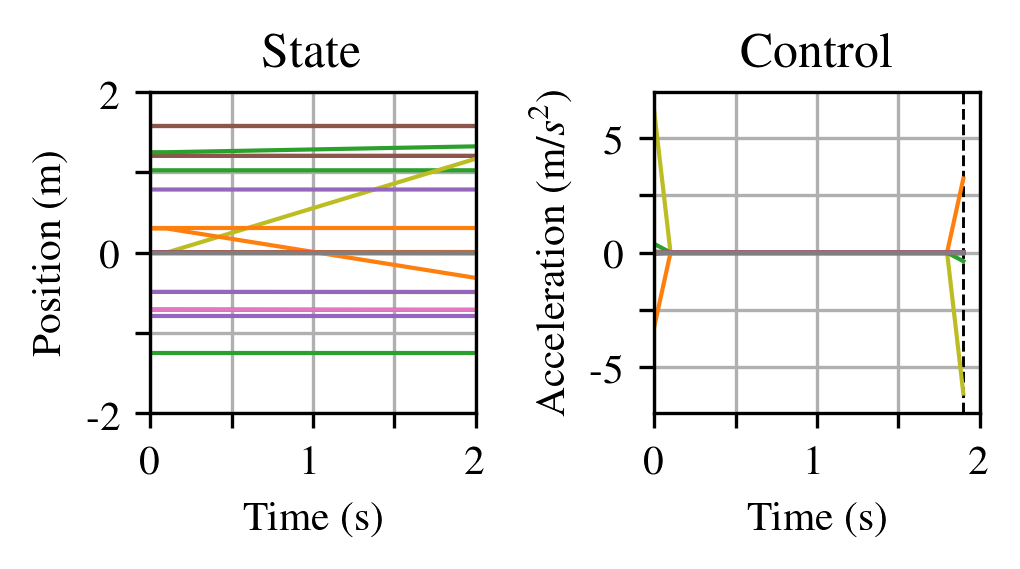

In [8]:
fig = plt.figure() #figsize=(13,6))
fig.set_size_inches(3.5, 2)
fig.set_dpi(300)

ax = plt.subplot(1,2,1)
plt.grid()
plt.title('State')
plt.plot(times, pseudo_huber_problem.X[:38,:].T, linewidth=1)

ax.set_xticks(np.linspace(0, 2, 5))
ax.set_xticklabels(['0', '', '1', '', '2'])
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_yticklabels(['-2', '', '0', '', '2'])

plt.xlabel('Time (s)')
plt.xlim(0, 2)
plt.ylabel('Position (m)')

ax = plt.subplot(1,2,2)
plt.plot(times[:-1], pseudo_huber_solution, label='Solution', linewidth=1)
plt.title('Control')
plt.ylim(*ylims)
plt.xlim(0, 1.9)


plt.vlines(1.9, ylims[0], ylims[1], linewidth=0.7, linestyle='dashed')
ax.set_xticks(np.linspace(0, 2, 5))
ax.set_xticklabels(['0', '', '1', '', '2'])
ax.set_yticks(np.linspace(-5, 5, 5))
ax.set_yticklabels(['-5', '', '0', '', '5'])


plt.grid()
plt.xlabel('Time (s)')
plt.ylabel(r'Acceleration (m/$s^2$)')

plt.tight_layout()

In [9]:
joint_used = [
    not np.allclose(pseudo_huber_problem.X[i + 38,:], 0, atol=1e-3) for i in
        range(pseudo_huber_problem.num_controls)
]
print('PseudoHuber used {0} joints'.format(np.sum(joint_used)))

PseudoHuber used 9 joints
